## SELECT, DISTINCT, COUNT, LIMIT

<table>
<tr>
<th> SQL </th>
<th> Python </th>
</tr>


<tr>
<td>
<pre>
SELECT name
FROM titanic_test_data
</pre>
</td>

<td>
<pre>
titanic_df["name"]
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT *
FROM titanic_test_data
LIMIT 5
</pre>
</td>

<td>
<pre>
titanic_df.head(5)
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT DISTINCT age
FROM titanic_test_data
</pre>
</td>

<td>
<pre>
titanic_df["age"].unique()
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT COUNT(DISTINCT age)
FROM titanic_test_data
</pre>
</td>

<td>
<pre>
len(titanic_df["age"].unique())
</pre>
</td>
</tr>


</table>

titanic_df[“age”].unique() will return an array of unique values here, so we would need to use len() to get the count of unique values.

## SELECT, WHERE, OR, AND, IN (SELECT with conditions)

<table>
<tr>
<th> SQL </th>
<th> Python </th>
</tr>


<tr>
<td>
<pre>
SELECT *
FROM titanic_test_data
WHERE pclass = 1
</pre>
</td>

<td>
<pre>
titanic_df[titanic_df.pclass == 1]
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT *
FROM titanic_test_data
WHERE pclass = 1
OR pclass = 2
</pre>
</td>

<td>
<pre>
titanic_df[(titanic_df.pclass == 1) | 
(titanic_df.pclass == 2)]
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT *
FROM titanic_test_data
WHERE pclass IN (1,2)
</pre>
</td>

<td>
<pre>
titanic_df[titanic_df.pclass.isin([1,2])]
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT name
FROM titanic_test_data
WHERE pclass = 1 
AND gender = "male"
</pre>
</td>

<td>
<pre>
titanic_df[(titanic_df.pclass == 1) 
& (titanic_df.gender == "male")]["name"] 
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT name, age
FROM titanic_test_data
WHERE pclass NOT IN (1,2)
</pre>
</td>

<td>
<pre>
titanic_df[~titanic_df.pclass.isin([1,2])] 
[["name","age"]]
</pre>
</td>
</tr>


</table>

If we only want to select specific columns from the dataframe, we can select using another pair of square bracket.

Note: If you are selecting multiple columns, you will need to put array ["name","age"] inside the square bracket.

isin() works exactly the same as IN in SQL. To use NOT IN, we would need to use the negation(~)in Python to achieve the same result.

## GROUP BY, ORDER BY, COUNT

<table>
<tr>
<th> SQL </th>
<th> Python </th>
</tr>


<tr>
<td>
<pre>
SELECT
pclass,
gender,
COUNT(*)
FROM titanic_test_data
GROUP BY 1,2
</pre>
</td>

<td>
<pre>
titanic_df.groupby(["pclass","gender"]).size()
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT
pclass,
gender,
COUNT(*)
FROM titanic_test_data
GROUP BY 1,2
ORDER BY 3 DESC
</pre>
</td>

<td>
<pre>
titanic_df.groupby(["pclass","gender"])
.size().sort_values(ascending=False) 
</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT
name,
pclass,
gender
FROM titanic_test_data
ORDER BY 1, 2 DESC
</pre>
</td>

<td>
<pre>
titanic_df.sort_values(["name","pclass"],
ascending=[True,False])
[["name","pclass","gender"]] 

</pre>
</td>
</tr>


<tr>
<td>
<pre>
SELECT
pclass,
gender,
SUM(fare)
FROM titanic_test_data
GROUP BY 1,2
</pre>
</td>

<td>
<pre>
titanic_df.groupby(["pclass","gender"]).sum()["fare"]
</pre>
</td>
</tr>


</table>

If we want to sort the COUNT only, we can just pass the boolean into the sort_values function. If we are going to sort multiple columns, then we have to pass an array of boolean to the sort_values function.

sum() function will give us all aggregate numeric sum columns in the dataframe, we need to specify the column name using square bracket if we just need a specific column.

## MIN, MAX, MEAN, MEDIAN

<table>
<tr>
<th> SQL </th>
<th> Python </th>
</tr>


<tr>
<td>
<pre>
SELECT
MIN(age) AS min,
MAX(age) AS max,
AVG(age) AS mean,
APPROX_QUANTILES(age, 100)[OFFSET(50)] AS median
FROM titanic_test_data
</pre>
</td>

<td>
<pre>
titanic_df.agg(
{'age': ['min', 'max', 
'mean', 'median']})
</pre>
</td>
</tr>



</table>

Since SQL doesn’t have a median function, I will use BigQuery APPROX_QUANTILES to get the median of age.

The pandas aggregation function .agg() also supports other function like sum.

# 20 Useful Pandas Functions

## Query

In [5]:
import numpy as np
import pandas as pd

values_1 = np.random.randint(10, size=10)
values_2 = np.random.randint(10, size=10)
years = np.arange(2010,2020)
groups = ['A','A','B','A','B','B','C','A','C','C']
df = pd.DataFrame({'group':groups, 'year':years, 'value_1':values_1, 'value_2':values_2})
df

,group,year,value_1,value_2
0,A,2010,4,3
1,A,2011,9,8
2,B,2012,4,3
3,A,2013,6,5
4,B,2014,7,6
5,B,2015,5,7
6,C,2016,4,4
7,A,2017,4,7
8,C,2018,0,0
9,C,2019,8,1


In [6]:
df.query('value_1 < value_2')

,group,year,value_1,value_2
5,B,2015,5,7
7,A,2017,4,7


## Insert

In [7]:
#new column
new_col = np.random.randn(10)

#insert the new column at position 2
df.insert(2, 'new_col', new_col)
df

# We need to specify the position by passing an index as first argument. 
# This value must be an integer. Column indices start from zero just like row indices. 
# The second argument is column name and the third argument is the object that includes values which can be Series or an array-like object.

,group,year,new_col,value_1,value_2
0,A,2010,0.290028,4,3
1,A,2011,1.199504,9,8
2,B,2012,2.049152,4,3
3,A,2013,1.667381,6,5
4,B,2014,0.561014,7,6
5,B,2015,0.575000,5,7
6,C,2016,0.190302,4,4
7,A,2017,1.009683,4,7
8,C,2018,0.526133,0,0
9,C,2019,-2.253152,8,1


## Cumsum

In [12]:
df['cumsum_2'] = df[['value_2','group']].groupby('group').cumsum()
df.sort_values(['group', 'cumsum_2'])

,group,year,new_col,value_1,value_2,cumsum_2
0,A,2010,0.290028,4,3,3
1,A,2011,1.199504,9,8,11
3,A,2013,1.667381,6,5,16
7,A,2017,1.009683,4,7,23
2,B,2012,2.049152,4,3,3
4,B,2014,0.561014,7,6,9
5,B,2015,0.575000,5,7,16
6,C,2016,0.190302,4,4,4
8,C,2018,0.526133,0,0,4
9,C,2019,-2.253152,8,1,5


## Sample

In [13]:
sample1 = df.sample(n=3)
sample1

,group,year,new_col,value_1,value_2,cumsum_2
7,A,2017,1.009683,4,7,23
6,C,2016,0.190302,4,4,4
4,B,2014,0.561014,7,6,9


## Where

In [ ]:
# “Where” is used to replace values in rows or columns based on a condition.
# The default replacement values is NaN but we can also specify the value to be put as a replacement.

# The way “where” works is that values that fit the condition are selected and the remaining values are replaced with the specified value. where(df[‘new_col’]>0, 0) selects all the values in “new_col” that are greater than 0 and the remaining values are replaced with 0. Thus, where can also be considered as a mask operation.
# One important point is that “where” for Pandas and NumPy are not exactly the same. We can achieve the same result but with slightly different syntax. With DataFrame.where, the values that fit the condition are selected as is and the other values are replaced with the specified value. Np.where requires to also specify the value for the ones that fit the condition. The following two lines return the same result:

df['new_col'].where(df['new_col'] > 0 , 0)
np.where(df['new_col'] > 0, df['new_col'], 0)

array([0.        , 0.        , 0.        , 0.        , 1.15689423,
       0.        , 0.10372176, 0.        , 0.        , 0.        ])

## Isin

In [ ]:
# We use filtering or selecting methods a lot when working with dataframes.

# Isin method is kind of an advanced filtering. For example, we can filter values based on a list of selections.
years = ['2010','2014','2017']
df[df.year.isin(years)]

,group,year,new_col,value_1,value_2,cumsum_2
0,A,2010,-0.943155,9,7,7
4,B,2014,1.156894,6,3,12
7,A,2017,-0.726145,9,1,19


## Loc and iloc

Loc and iloc are used to select rows and columns.

*   loc: select by labels
*   iloc: select by positions

loc is used to select data by label. The labels of columns are the column names. We need to be careful about row labels. If we do not assign any specific indices, pandas created integer index by default. Thus, the row labels are integers starting from 0 and going up. The row positions that are used with iloc are also integers starting from 0.

In [ ]:
# Selecting first 3 rows and first 2 columns with iloc:
df.iloc[:3, :2]

,group,year
0,A,2010
1,A,2011
2,B,2012


In [ ]:
# Selecting first 3 rows and first 2 columns with loc:
df.loc[:2, ['group', 'year']]

,group,year
0,A,2010
1,A,2011
2,B,2012


In [ ]:
# Note: Upper boundaries of indices are included when loc is used whereas they are excluded with iloc.

# Selecting rows “1”, “3”, “5” and columns “year” and “value_1”:
df.loc[[1,3,5], ['year', 'value_1']]

,year,value_1
1,2011,8
3,2013,5
5,2015,6


## Pct_change

This function is used to calculate the percent change through the values in a series. Consider we have a series that contains [2,3,6]. If we apply pct_change to this series, the returned series will be [NaN, 0.5, 1.0]. 

There is 50% increase from the first element to the second and 100% from the second to the third one. Pct_change function is useful in comparing the percentage of change in a time series of elements.

In [ ]:
df.value_1.pct_change()

0         NaN
1   -0.111111
2   -0.375000
3    0.000000
4    0.200000
5    0.000000
6   -0.500000
7    2.000000
8   -0.888889
9    2.000000
Name: value_1, dtype: float64

## Rank


Rank function assigns rank to the values. Assume we have a series s that contains [1,7,5,3]. The ranks assigned to these values will be [1,4,3,2].

In [ ]:
df['rank_1'] = df['value_1'].rank()
df

,group,year,new_col,value_1,value_2,cumsum_2,rank_1
0,A,2010,-0.943155,9,7,7,9.5
1,A,2011,-1.338546,8,4,11,8.0
2,B,2012,-1.550581,5,9,9,4.5
3,A,2013,-1.091030,5,7,18,4.5
4,B,2014,1.156894,6,3,12,6.5
5,B,2015,-0.094821,6,6,18,6.5
6,C,2016,0.103722,3,2,2,2.5
7,A,2017,-0.726145,9,1,19,9.5
8,C,2018,-0.952616,1,3,5,1.0
9,C,2019,-1.407730,3,6,11,2.5


## Melt

Melt is used to convert wide dataframes to narrow ones. What I mean by wide is a dataframe with a high number of columns. Some dataframes are structured in a way that consecutive measurements or variables are represented as columns. In some cases, representing these columns as rows may fit better to our task. Consider the following dataframe:

In [ ]:
wide = [{'city': 'A', 'day1':22, 'day2':10, 'day3':25, 'day4':18, 'day5':12},
        {'city': 'B', 'day1':25, 'day2':14, 'day3':22, 'day4':15, 'day5':14},
        {'city': 'C', 'day1':28, 'day2':13, 'day3':26, 'day4':17, 'day5':18}]

df_wide = pd.DataFrame(wide)
df_wide

,city,day1,day2,day3,day4,day5
0,A,22,10,25,18,12
1,B,25,14,22,15,14
2,C,28,13,26,17,18


In [ ]:
df_wide.melt(id_vars=['city'])
# Variable and value column names are given by default. We can use var_name and value_name parameters of melt function to assign new column names.
df_wide.melt(id_vars=['city'], var_name='days', value_name=('temp'))


,city,days,temp
0,A,day1,22
1,B,day1,25
2,C,day1,28
3,A,day2,10
4,B,day2,14
5,C,day2,13
6,A,day3,25
7,B,day3,22
8,C,day3,26
9,A,day4,18


## Explode

In [ ]:
# Assume your data set includes multiple entries of a feature on a single observation (row) but you want to analyze them on separate rows.

exp = [{'ID': 'a', 'measurement':4, 'day':1},
        {'ID': 'b', 'measurement':6, 'day':1},
        {'ID': 'c', 'measurement':[2, 3, 8], 'day':1}]

df2 = pd.DataFrame(exp)
df2

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,"[2, 3, 8]",1


In [ ]:
df2.explode('measurement').reset_index(drop=True)

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
3,c,3,1
4,c,8,1


## Nunique

In [ ]:
# Nunique counts the number of unique entries over columns or rows. It is very useful in categorical features especially in cases where we do not know the number of categories beforehand. Let’s take a look at our initial dataframe:
df

,group,year,new_col,value_1,value_2,cumsum_2,rank_1
0,A,2010,-0.943155,9,7,7,9.5
1,A,2011,-1.338546,8,4,11,8.0
2,B,2012,-1.550581,5,9,9,4.5
3,A,2013,-1.091030,5,7,18,4.5
4,B,2014,1.156894,6,3,12,6.5
5,B,2015,-0.094821,6,6,18,6.5
6,C,2016,0.103722,3,2,2,2.5
7,A,2017,-0.726145,9,1,19,9.5
8,C,2018,-0.952616,1,3,5,1.0
9,C,2019,-1.407730,3,6,11,2.5


In [ ]:
print(df.year.nunique())
print(df.group.nunique())

df.nunique()

# If axis parameter is set to 1, nunique returns the number of unique values in each row.

10
3


group        3
year        10
new_col     10
value_1      6
value_2      7
cumsum_2     8
rank_1       6
dtype: int64

## Lookup

It can be used to look up values in the DataFrame based on the values on other row, column pairs. 

This function is best explained via an example. Assume we have the following DataFrame:

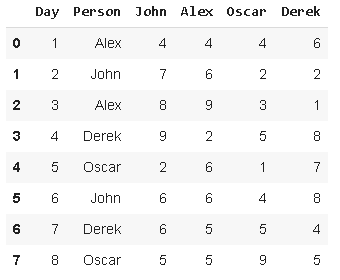


For each day, we have measurements of 4 people and a column that includes the names of these 4 people. We want to create a new column that shows the measurement of the person in “Person” column. Thus, for the first row, the value in the new column will be 4 (the value in column “Alex”).

df['Person_point'] = df.lookup(df.index, df['Person'])
df
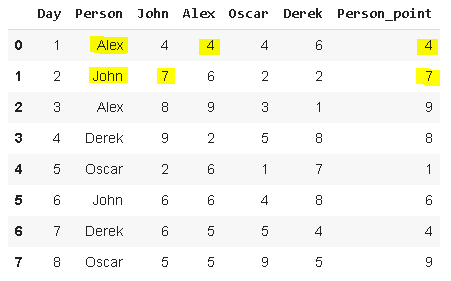


## Infer_objects

Pandas supports a wide range of data types, one of which is object. Object covers text or mixed (numeric and non-numeric) values. However, it is not preferred to use object data type if a different option is available. Certain operations is executed faster with more specific data types. For example, we prefer to have integer or float data type for numerical values.

In [ ]:
# infer_objects attempts to infer better data types for object columns. Consider the following dataframe:

data = [{'A': '1', 'B': '2.1', 'C': 'True', 'D': 'b'},
        {'A': '2', 'B': '1.5', 'C': 'False', 'D': 'c'},
        {'A': '3', 'B': '2', 'C': 'False', 'D': 'd'},
        {'A': '4', 'B': '2.1', 'C': 'True', 'D': 'f'}]

df3 = pd.DataFrame(data)
df3

,A,B,C,D
0,1,2.1,True,b
1,2,1.5,False,c
2,3,2,False,d
3,4,2.1,True,f


In [ ]:
df3.dtypes

A    object
B    object
C    object
D    object
dtype: object

In [ ]:
df3.infer_objects().dtypes

A    object
B    object
C    object
D    object
dtype: object

##

## 

## Memory_usage

In [ ]:
df_large = pd.DataFrame({'A': np.random.randn(1000000),
                    'B': np.random.randint(100, size=1000000)})
df_large.shape

(1000000, 2)

In [ ]:
for col in df_large.columns:
    print(f'Size of {col}:', df_large[col].memory_usage() / (1024**2))

print(f'\nSize of df_large:', df_large.memory_usage().sum()  / (1024**2) )

Size of A: 7.6295166015625
Size of B: 7.6295166015625

Size of df_large: 15.2589111328125


## Describe

In [ ]:
df.describe()

,year,new_col,value_1,value_2,cumsum_2,rank_1
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2014.50000,-0.684401,5.500000,4.800000,11.200000,5.500000
std,3.02765,0.841062,2.677063,2.573368,5.769652,2.990726
min,2010.00000,-1.550581,1.000000,1.000000,2.000000,1.000000
25%,2012.25000,-1.276667,3.500000,3.000000,7.500000,3.000000
50%,2014.50000,-0.947885,5.500000,5.000000,11.000000,5.500000
75%,2016.75000,-0.252652,7.500000,6.750000,16.500000,7.625000
max,2019.00000,1.156894,9.000000,9.000000,19.000000,9.500000


## Merge

Merge() combines DataFrames based on values in shared columns. Consider the following two dataframes.

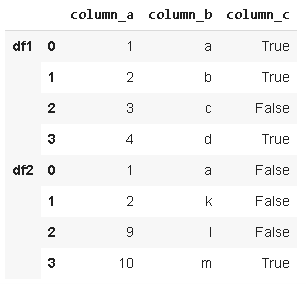

We can merge them based on shared values in a column. The parameter that sets the condition for merging is the “on” parameter.

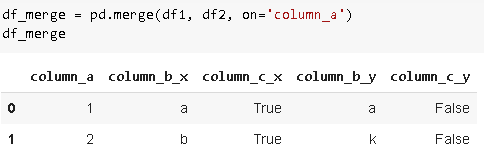

df1 and df2 are merged based on the common values in column_a. The how parameter of merge function allows to combine dataframes in different ways. The possible values for how are ‘inner’, ‘outer’, ‘left’, ‘right’.
inner: only rows with same values in the column specified by on parameter (default value of how parameter)
outer: all the rows
left: all rows from left DataFrame
right: all rows from right DataFrame

## Select_dtypes

In [ ]:
df.select_dtypes(include='int64')

,year,value_1,value_2,cumsum_2
0,2010,9,7,7
1,2011,8,4,11
2,2012,5,9,9
3,2013,5,7,18
4,2014,6,3,12
5,2015,6,6,18
6,2016,3,2,2
7,2017,9,1,19
8,2018,1,3,5
9,2019,3,6,11


In [ ]:
df.select_dtypes(exclude='int64')

,group,new_col,rank_1
0,A,-0.943155,9.5
1,A,-1.338546,8.0
2,B,-1.550581,4.5
3,A,-1.091030,4.5
4,B,1.156894,6.5
5,B,-0.094821,6.5
6,C,0.103722,2.5
7,A,-0.726145,9.5
8,C,-0.952616,1.0
9,C,-1.407730,2.5


## Replace

In [ ]:
df.replace('A', 'A_1')

,group,year,new_col,value_1,value_2,cumsum_2,rank_1
0,A_1,2010,-0.943155,9,7,7,9.5
1,A_1,2011,-1.338546,8,4,11,8.0
2,B,2012,-1.550581,5,9,9,4.5
3,A_1,2013,-1.091030,5,7,18,4.5
4,B,2014,1.156894,6,3,12,6.5
5,B,2015,-0.094821,6,6,18,6.5
6,C,2016,0.103722,3,2,2,2.5
7,A_1,2017,-0.726145,9,1,19,9.5
8,C,2018,-0.952616,1,3,5,1.0
9,C,2019,-1.407730,3,6,11,2.5


In [ ]:
df.replace({'A':'A_1', 'B':'B_1'})

,group,year,new_col,value_1,value_2,cumsum_2,rank_1
0,A_1,2010,-0.943155,9,7,7,9.5
1,A_1,2011,-1.338546,8,4,11,8.0
2,B_1,2012,-1.550581,5,9,9,4.5
3,A_1,2013,-1.091030,5,7,18,4.5
4,B_1,2014,1.156894,6,3,12,6.5
5,B_1,2015,-0.094821,6,6,18,6.5
6,C,2016,0.103722,3,2,2,2.5
7,A_1,2017,-0.726145,9,1,19,9.5
8,C,2018,-0.952616,1,3,5,1.0
9,C,2019,-1.407730,3,6,11,2.5


## Applymap

Applymap function is used to apply a function to a dataframe elementwise. Please note that if a vectorized version of an operation is available, it should be preferred over applymap. For instance, if we want to multiple each element by a number, we don’t need and should not use applymap function. A simple vectorized operation (e.g. df * 4 ) is much faster in that case.

In [ ]:
# Vectorised functions are preffered, i.e.:
df['cumsum_2']*4

0    28
1    44
2    36
3    72
4    48
5    72
6     8
7    76
8    20
9    44
Name: cumsum_2, dtype: int64

In [ ]:
# However, there might be some cases where we do not have the option of vectorized operation. For instance, we can change the style of a dataframe using Style property of pandas dataframes. 
# The following function changes the color of negative values as red.
def color_negative_values(val):
   color = 'red' if val < 0 else 'black'
   return 'color: %s' % color


data = [{'A':-1.200000, 'B':8.100000},
        {'A':-4.400000, 'B':3.100000},
        {'A':3.000000, 'B':2.200000},
        {'A':5.200000, 'B':-2.500000},
        {'A':-2.300000, 'B':5.200000}]

df4 = pd.DataFrame(data)
df4.style.applymap(color_negative_values)

,A,B
0,-1.200000,8.100000
1,-4.400000,3.100000
2,3.000000,2.200000
3,5.200000,-2.500000
4,-2.300000,5.200000
